# Importing Libraries

These are just a few examples of popular Python libraries. You can import any other library using the same import statement followed by the library name or alias:

NumPy: for numerical operations and array manipulation

Pandas: for data manipulation and analysis

Matplotlib: for creating visualizations

Scikit-learn: for machine learning algorithms

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Reading Dataset

In [2]:
from tensorflow.keras.datasets import cifar10

# Splitting Dataset

Dataset splitting is an important step in machine learning and data analysis. It involves dividing a dataset into two or more subsets to train and evaluate a model effectively. The most common type of dataset splitting is into training and testing subsets.

Train-Test Split: This is the most basic type of split, where the dataset is divided into a training set and a testing set. The training set is used to train the machine learning model, while the testing set is used to evaluate its performance. The split is typically done using a fixed ratio, such as 80% for training and 20% for testing.

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [5]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

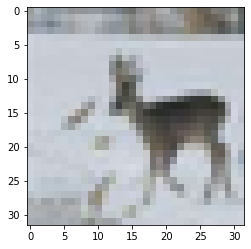

In [6]:
plt.imshow(x_train[20])

In [7]:
x_train[20]

array([[[153, 157, 155],
        [174, 180, 188],
        [155, 165, 172],
        ...,
        [122, 125, 123],
        [138, 143, 141],
        [ 97, 101,  97]],

       [[160, 163, 165],
        [164, 170, 180],
        [150, 159, 169],
        ...,
        [137, 135, 129],
        [160, 161, 157],
        [103, 109, 107]],

       [[140, 143, 147],
        [147, 152, 166],
        [136, 145, 158],
        ...,
        [104, 103,  99],
        [125, 128, 125],
        [ 93, 102, 101]],

       ...,

       [[175, 177, 179],
        [170, 172, 174],
        [170, 172, 174],
        ...,
        [193, 203, 212],
        [197, 206, 214],
        [199, 204, 213]],

       [[174, 177, 181],
        [173, 176, 180],
        [171, 174, 178],
        ...,
        [200, 208, 216],
        [202, 209, 218],
        [208, 212, 221]],

       [[168, 173, 180],
        [164, 169, 175],
        [166, 171, 177],
        ...,
        [204, 209, 217],
        [204, 208, 217],
        [206, 210, 219]]

In [8]:
x_train.min(), x_train.max()

(0, 255)

In [9]:
x_train = x_train / 255
x_test = x_test / 255

In [10]:
x_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

# Converting To Categorical

Converting data to categorical format is often necessary for certain machine learning tasks, especially when dealing with categorical or nominal variables. This conversion is typically performed to represent the categorical variables as numeric values that can be processed by machine learning algorithms.

In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [13]:
y_train_categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [14]:
y_test_categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

# Buliding Model

Creating a deep learning model involves defining the architecture and structure of the neural network, specifying the layers, and configuring the parameters for training.

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [16]:
from tensorflow.keras.callbacks import EarlyStopping

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
model = Sequential()
model.add(Conv2D(filters = 32, input_shape = (32, 32, 3), kernel_size = (4, 4), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(filters = 32, input_shape = (32, 32, 3), kernel_size = (4, 4), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))

model.add(Dense(10, activation = 'softmax'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 256)               2

# Compiling Model

Compiling the model in deep learning involves configuring essential components that define how the model will be trained.

In [20]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [21]:
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 3)

# Training Model

Training the model in deep learning involves the process of iteratively updating the model's parameters (weights and biases) based on the provided training data to minimize the loss function and improve the model's performance

In [23]:
model.fit(x_train, y_train_categorical,
          validation_data = (x_test, y_test_categorical),
          epochs = 20, 
          callbacks = [early_stopping])

Epoch 1/20
1563/1563 [==============================] - 93s 52ms/step - loss: 1.5270 - accuracy: 0.4510 - val_loss: 1.3942 - val_accuracy: 0.5197
Epoch 2/20
1563/1563 [==============================] - 76s 48ms/step - loss: 1.1747 - accuracy: 0.5882 - val_loss: 1.2235 - val_accuracy: 0.5676
Epoch 3/20
1563/1563 [==============================] - 70s 45ms/step - loss: 1.0241 - accuracy: 0.6431 - val_loss: 1.0493 - val_accuracy: 0.6418
Epoch 4/20
1563/1563 [==============================] - 69s 44ms/step - loss: 0.9223 - accuracy: 0.6812 - val_loss: 1.0268 - val_accuracy: 0.6432
Epoch 5/20
1563/1563 [==============================] - 69s 44ms/step - loss: 0.8391 - accuracy: 0.7111 - val_loss: 1.0076 - val_accuracy: 0.6654
Epoch 6/20
1563/1563 [==============================] - 71s 45ms/step - loss: 0.7757 - accuracy: 0.7350 - val_loss: 1.1338 - val_accuracy: 0.6390
Epoch 7/20
1563/1563 [==============================] - 66s 42ms/step - loss: 0.7171 - accuracy: 0.7548 - val_loss: 1.1370 -

In [24]:
model.save('CNN_model_for_CIFAR10.h5')

In [25]:
loss = pd.DataFrame(model.history.history)

In [26]:
loss.head()

,loss,accuracy,val_loss,val_accuracy
0,1.527025,0.45100,1.394204,0.5197
1,1.174664,0.58818,1.223536,0.5676
2,1.024142,0.64308,1.049320,0.6418
3,0.922272,0.68118,1.026793,0.6432
4,0.839058,0.71106,1.007593,0.6654


<AxesSubplot:>

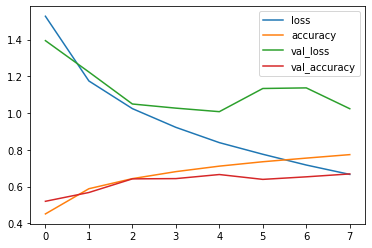

In [27]:
loss.plot()

<AxesSubplot:>

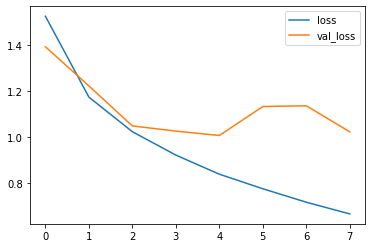

In [28]:
loss[['loss', 'val_loss']].plot()

<AxesSubplot:>

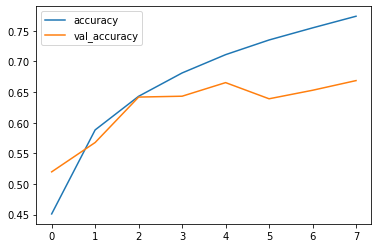

In [29]:
loss[['accuracy', 'val_accuracy']].plot()

In [34]:
prediction = model.predict(x_test)
prediction_classes = prediction.argmax(axis = 1)

313/313 [==============================] - 5s 16ms/step


# Error Analysis

Error analysis is an important step in evaluating and improving the performance of a machine learning model. It involves analyzing the errors made by the model during predictions to gain insights into the patterns, sources, and potential improvements.

In [35]:
print(classification_report(y_test, prediction_classes))

              precision    recall  f1-score   support

           0       0.69      0.75      0.72      1000
           1       0.79      0.82      0.81      1000
           2       0.64      0.47      0.54      1000
           3       0.38      0.69      0.49      1000
           4       0.71      0.55      0.62      1000
           5       0.63      0.43      0.51      1000
           6       0.80      0.70      0.75      1000
           7       0.71      0.76      0.74      1000
           8       0.82      0.73      0.77      1000
           9       0.73      0.79      0.76      1000

    accuracy                           0.67     10000
   macro avg       0.69      0.67      0.67     10000
weighted avg       0.69      0.67      0.67     10000



In [37]:
print(confusion_matrix(prediction_classes, y_test))

[[750  18  79  26  30  15  12  25  94  37]
 [ 32 818  10  14   6   6  17   3  51  74]
 [ 40   6 466  38  58  37  36  19  14   9]
 [ 34  23 189 687 165 375 146  90  35  41]
 [ 12   3  77  40 551  28  35  27   2   3]
 [  5   6  54  86  35 431  23  30   4   7]
 [  9   7  56  31  27  22 697   7   9   2]
 [ 14   5  45  41 103  64  13 762   7  15]
 [ 61  19  10  15  15   8   8   3 731  18]
 [ 43  95  14  22  10  14  13  34  53 794]]


<AxesSubplot:>

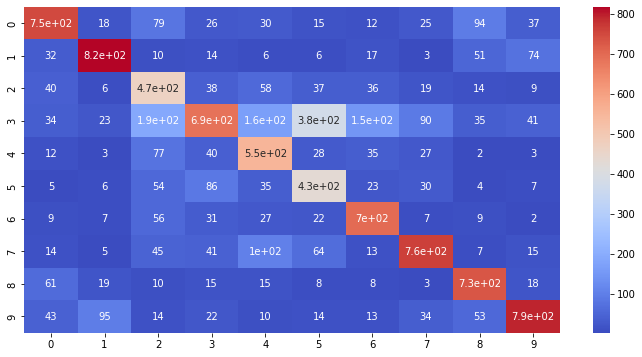

In [41]:
plt.figure(figsize = (12, 6))
sns.heatmap(confusion_matrix(prediction_classes, y_test),
            annot = True, 
            cmap = 'coolwarm')

# Prediction

In [57]:
prediction = x_train[5]

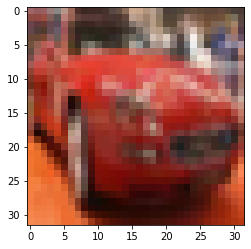

In [58]:
plt.imshow(prediction)

In [59]:
predictions = model.predict(prediction.reshape(1, 32, 32, 3))
predicted_class = np.argmax(predictions)

print("Predicted class:", predicted_class)

1/1 [==============================] - 0s 50ms/step
Predicted class: 1
